In [1]:
import pickle 

In [2]:
# with open('/mnt/swordfish-pool2/ccu/as5957-cache.pkl', 'rb') as handle:
#     annotations = pickle.load(handle)

with open('/home/as5957/research_spring_2023/video_annotations.pkl', 'rb') as handle:
    annotations = pickle.load(handle)

In [30]:
def get_change_points(annotations,file_id):
  change_points_dict = annotations[file_id]
  change_points = change_points_dict['changepoints']
  return change_points

def process_video_frame(annotations, file_id, time):
  utterances = annotations[file_id]['utterances'] #list of dictionaries with vars for an utterance 
  for utter in utterances:
    if time <=utter['end'] and time >= utter['start']:
      return utter['video_frames']
      


In [1]:
from feat.utils.io import read_feat

fex = read_feat('/home/as5957/research_spring_2023/extracted_test.csv')

In [15]:
temp = fex.drop(['time'], axis = 1)

In [16]:
temp = temp.iloc[0:5]

In [17]:
temp = temp.set_index('Unnamed: 0')

In [18]:
temp.index.name = None

In [10]:
temp

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,91.000665,137.403697,56.794095,73.542472,0.984302,88.566523,90.860439,94.012388,98.928097,105.532000,...,0.883228,0.057281,0.000122,0.703488,0.024339,0.144161,0.051515,0.019095,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0
1,139.445882,118.707979,47.781060,55.682230,0.963324,142.662646,144.459387,146.824084,149.883695,153.588768,...,0.331335,0.000707,0.000357,0.004140,0.966346,0.001260,0.016202,0.010987,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0
2,560.523275,136.835223,32.725315,39.974004,0.678114,556.659939,558.013965,559.762478,562.552758,566.695043,...,0.611343,0.742077,0.004023,0.028189,0.054038,0.071213,0.085409,0.015051,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0
3,-1.030704,187.286957,41.171258,64.375334,0.577376,10.271351,10.724014,12.148395,15.184769,19.010730,...,0.650652,0.004904,0.000703,0.048159,0.864581,0.012955,0.060447,0.008252,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0


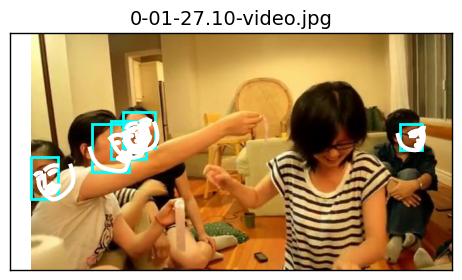

In [19]:
figs = temp.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)


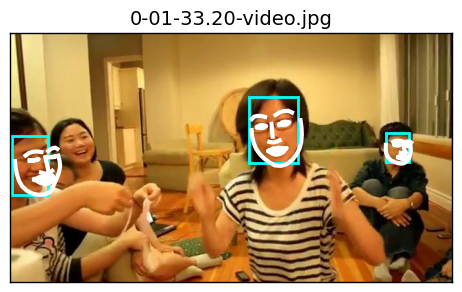

In [20]:
temp = fex.drop(['time'], axis = 1)
temp = temp.iloc[5:8]
temp = temp.set_index('Unnamed: 0')
temp.index.name = None
figs = temp.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)


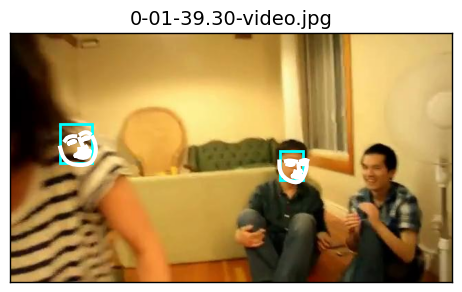

In [21]:
temp = fex.drop(['time'], axis = 1)
temp = temp.iloc[8:10]
temp = temp.set_index('Unnamed: 0')
temp.index.name = None
figs = temp.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)


In [13]:
temp

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
4,120.759833,132.367933,52.749986,57.786953,0.55388,121.152050,123.430675,126.470715,130.951011,136.602110,...,0.869411,0.080755,0.013318,0.105746,0.424566,0.201375,0.169884,0.004355,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0
0,344.986979,92.155020,70.734294,95.135130,0.99811,348.897148,349.831885,351.944582,355.654563,360.875194,...,0.084002,0.136832,0.000634,0.053594,0.487977,0.004856,0.120092,0.196015,/mnt/swordfish-pool2/ccu/LDC2022E11_CCU_TA1_Ma...,0


In [29]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
def calc_sim(df, features):
    
    df1 = df.iloc[0][features]
    df2 = df.loc[1:][features]
    return cosine_similarity(df1 , df2)
features = list(set(fex.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame','Unnamed: 0', 'time']))
arr = calc_sim(temp, features)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.51968146e+02  9.37856603e+01  1.52985595e+02  7.92725056e+01
  2.09924950e-02  1.00258799e+02  8.56511231e+01  1.00000000e+00
  8.18256859e+01  7.58592778e+01  1.72599199e+02  1.55582883e+02
  1.50951527e+02  8.85439867e+01  7.60370500e-01  1.70799665e+02
  1.14736720e+02  1.08195320e+02  1.70925022e+02  2.77837070e-01
  1.11221214e+02  1.75165883e+02  1.55149246e+02  1.22980589e+02
  1.12073293e+02  1.49390383e+02  1.64103742e+02  1.22077249e+02
  1.16386263e+02  1.00000000e+00  1.03952016e+02  4.65284470e-03
  1.56498109e+02  1.09636881e+02  1.65356527e+02  1.23407972e+02
  1.08180589e+02  1.89036980e+02  1.43212565e+02  1.05526619e+02
  1.07979858e+02  1.04946802e+02  1.07780539e+02  1.71688449e+02
  1.55344658e+02  1.91264350e-01  9.94134250e-01  1.67160160e+02
  7.21277456e+01  1.57233201e+02  1.08779395e+02  1.02682890e+02
  2.75292370e-01  4.54419520e-01  1.00205319e+02  9.76030470e-01
  1.02706194e+02  1.98295080e-02  1.68547686e+02  8.99138620e+01
  1.78128554e+02  1.77124132e+02  1.45023107e+02  1.05538100e+02
  1.68823010e+02  1.12042423e+02  9.37993250e+01  1.82450970e+02
 -2.13955931e+01  7.15144930e-01  1.11706608e+02  1.05869889e+02
  4.37365900e-01  7.85582400e-01  1.86609553e+02  9.62123880e+01
  1.48561882e+02  1.90093537e+02  1.45745674e+02  1.58763439e+02
  1.60412927e+02  8.79975350e+01  1.52634517e+02  1.77019794e+02
  1.72304612e+02  1.21347392e+02  1.08983294e+02  1.86473808e+02
  3.45408830e-01  1.06460130e+02  7.36639958e+01  1.21078959e+01
  6.96173400e-03  1.14112408e+02  3.10595050e-03  1.03001551e+02
  1.76249528e+02  1.71109321e+02  1.76517336e+02  1.58163381e+02
  9.98107994e+01  1.50793375e+02  1.05770564e+02  9.06689194e+01
  1.15149641e+02  1.50336454e+02  1.75102097e+02  1.08493365e+02
 -9.89274143e+00  1.06170850e-01  1.76307751e+02  1.50325543e+02
  1.69555176e+02  1.70570700e+02  9.59116900e-01  1.58068819e+02
  1.04844626e+02  9.12397660e+01  1.08825680e+02  6.78903300e-01
  1.19073035e+02  1.01961336e+02  1.71721007e+02  1.82108744e+02
  1.19761949e+02  5.12452360e-01  1.89104429e+02  1.10752701e+02
  7.48340250e-01  3.78664120e-04  1.79939585e+02  9.86789270e+01
  1.65997214e+02  1.01472149e+02  1.65129026e+02  1.60979020e+02
  1.42877197e+02  1.51342500e+02  1.69917937e+02  1.76889265e+02
  1.56025613e+02  1.10675909e+02  1.23683431e+02  1.11404587e+02
  1.90163575e+02  4.46027370e-01  3.16961940e-01  1.04974029e+02
  1.66947790e+02  8.42714414e+01  1.14071710e+02  9.76539166e+01
  9.05611581e+01  9.49985643e+01  7.93878528e+01  1.43956071e+02
  8.52556107e+01  1.13956458e+02  1.66528751e+02  1.79195535e+02
  1.48712483e+02  4.79139250e-03  1.52340138e+02  1.79307210e+02
  1.54763709e+02  1.03655224e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
temp1 = fex.loc[0:4]
temp2 = fex.loc[5:8]
temp3 = fex.loc[9:10]

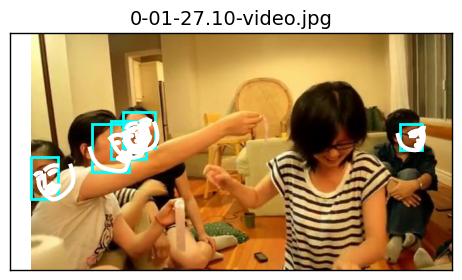

In [42]:
temp1 = temp1.drop(['time'], axis = 1)
temp1 = temp1.set_index('Unnamed: 0')
temp1.index.name = None
figs = temp1.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)

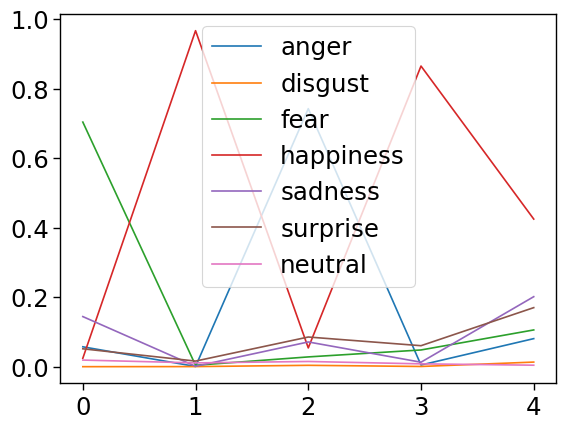

In [45]:
axes = temp1.emotions.plot()

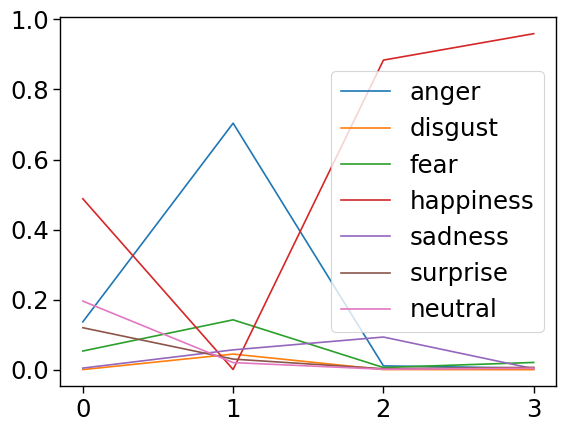

In [46]:
axes2 = temp2.emotions.plot()

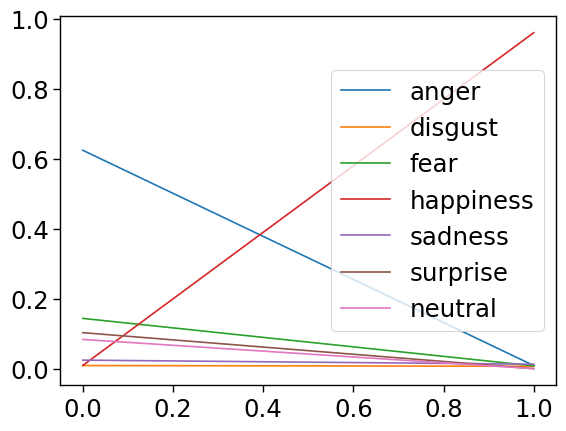

In [47]:
axes3 = temp3.emotions.plot()

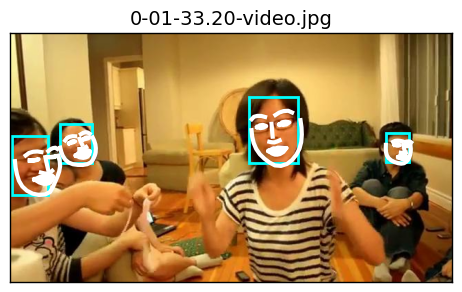

In [43]:
temp2 = temp2.drop(['time'], axis = 1)
temp2 = temp2.set_index('Unnamed: 0')
temp2.index.name = None
figs = temp2.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)

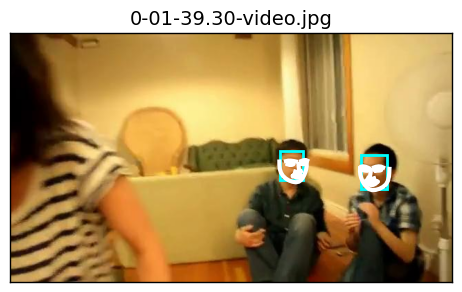

In [44]:
temp3 = temp3.drop(['time'], axis = 1)
temp3 = temp3.set_index('Unnamed: 0')
temp3.index.name = None
figs = temp3.plot_detections(faces='landmarks', faceboxes=True, muscles=False, poses=False, gazes=True, add_titles=True, au_barplot=False, emotion_barplot=False, plot_original_image=True)

In [62]:
def get_similarity(df, features):
    sim = []
    df = df[features]
    for i in range(len(df.index)-1):
        for j in range(i+1,len(df.index)):
            sim.append(np.dot(df.iloc[i], df.iloc[j])/(np.linalg.norm(df.iloc[i])*np.linalg.norm(df.iloc[j])))
    
    return sum(sim) / len(sim)


#sim for tmp1 

features = list(set(temp1.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame']))
arr = get_similarity(temp1, features)


In [67]:
times = list(fex['time'].unique())

In [66]:
emotions_features = fex.emotions.columns
musc_features = fex.aus.columns
head_pose = fex.poses.columns



array([87.1, 93.2, 99.3])

In [70]:
#plot sim for temp 1 
#all
features1 = list(set(temp1.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame']))
features2 = list(set(temp2.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame']))
features3 = list(set(temp3.columns) - set(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight','FaceScore', 'label', 'input', 'frame']))
arr1 = get_similarity(temp1, features)
arr2 = get_similarity(temp2, features)
arr3 = get_similarity(temp3, features)

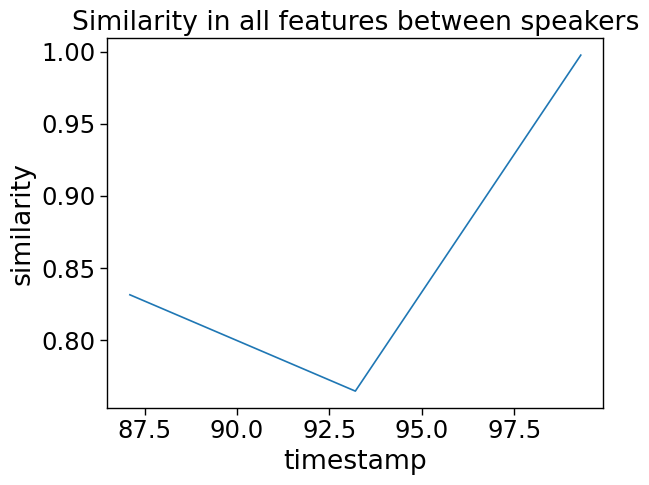

In [71]:
import matplotlib.pylab as plt
sims = [arr1,arr2,arr3]


plt.plot(times, sims)
plt.xlabel('timestamp')
plt.ylabel('similarity')
plt.title('Similarity in all features between speakers')
plt.show()

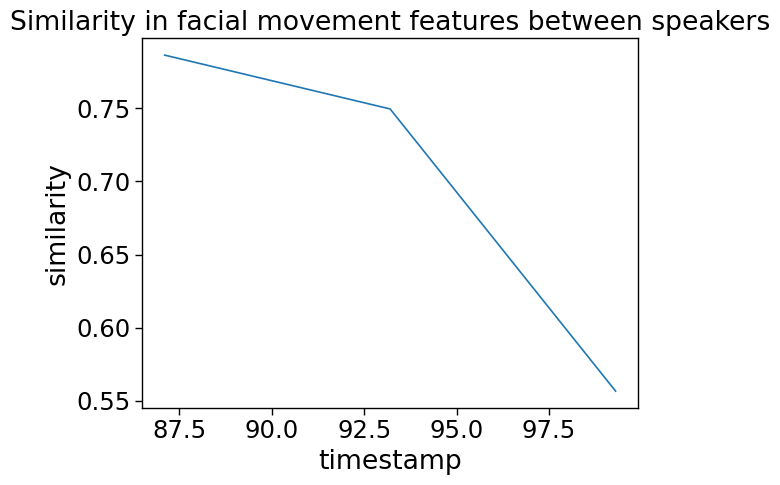

In [73]:
emotions_features = fex.emotions.columns
musc_features = fex.aus.columns
head_pose = fex.poses.columns
arr1 = get_similarity(temp1, musc_features)
arr2 = get_similarity(temp2, musc_features)
arr3 = get_similarity(temp3, musc_features)

sims = [arr1,arr2,arr3]

plt.plot(times, sims)
plt.xlabel('timestamp')
plt.ylabel('similarity')
plt.title('Similarity in facial movement features between speakers')
plt.show()

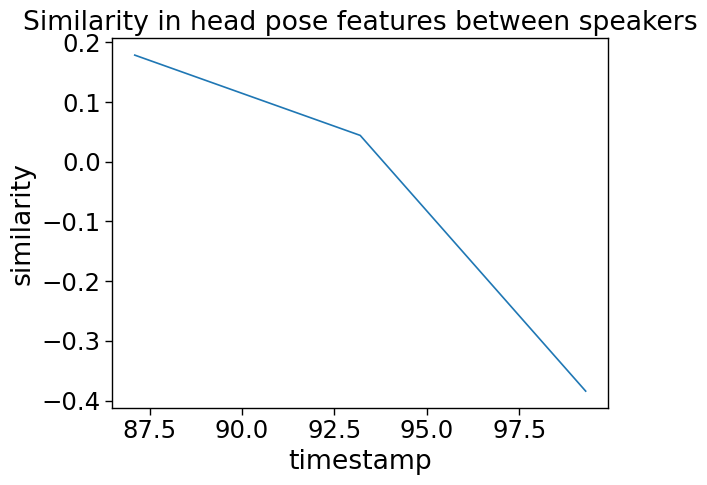

In [74]:
arr1 = get_similarity(temp1, head_pose)
arr2 = get_similarity(temp2, head_pose)
arr3 = get_similarity(temp3, head_pose)

sims = [arr1,arr2,arr3]

plt.plot(times, sims)
plt.xlabel('timestamp')
plt.ylabel('similarity')
plt.title('Similarity in head pose features between speakers')
plt.show()

In [61]:

def get_similarity(df):
    sim = []
    for i in range(len(df.index)-1):
        for j in range(i+1,len(df.index)):
            sim.append(np.dot(df.iloc[i], df.iloc[j])/(np.linalg.norm(df.iloc[i])*np.linalg.norm(df.iloc[j])))
    
    return sum(sim) / len(sim)

df = temp1[features]
avg = get_similarity(df)



In [52]:
temp1[features].columns

Index(['y_46', 'x_39', 'y_42', 'x_17', 'fear', 'x_59', 'x_19', 'AU07', 'x_18',
       'x_2',
       ...
       'x_36', 'x_45', 'y_33', 'y_59', 'y_21', 'anger', 'y_27', 'y_57', 'y_17',
       'x_61'],
      dtype='object', length=166)

In [49]:
temp1.columns

Index(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
       'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4',
       ...
       'AU43', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'input', 'frame'],
      dtype='object', length=173)